In [1]:
    import pandas as pd
    import matplotlib.pyplot as plt

    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
data = pd.read_csv('learner_feedback.csv')

In [3]:
data.head()


,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [6]:
data.shape

(1000, 2)

In [7]:
data.dropna(inplace=True)

In [8]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [9]:

data['text'] = data['text'].apply(clean_review)

In [10]:
#wordcloud 

from wordcloud import WordCloud

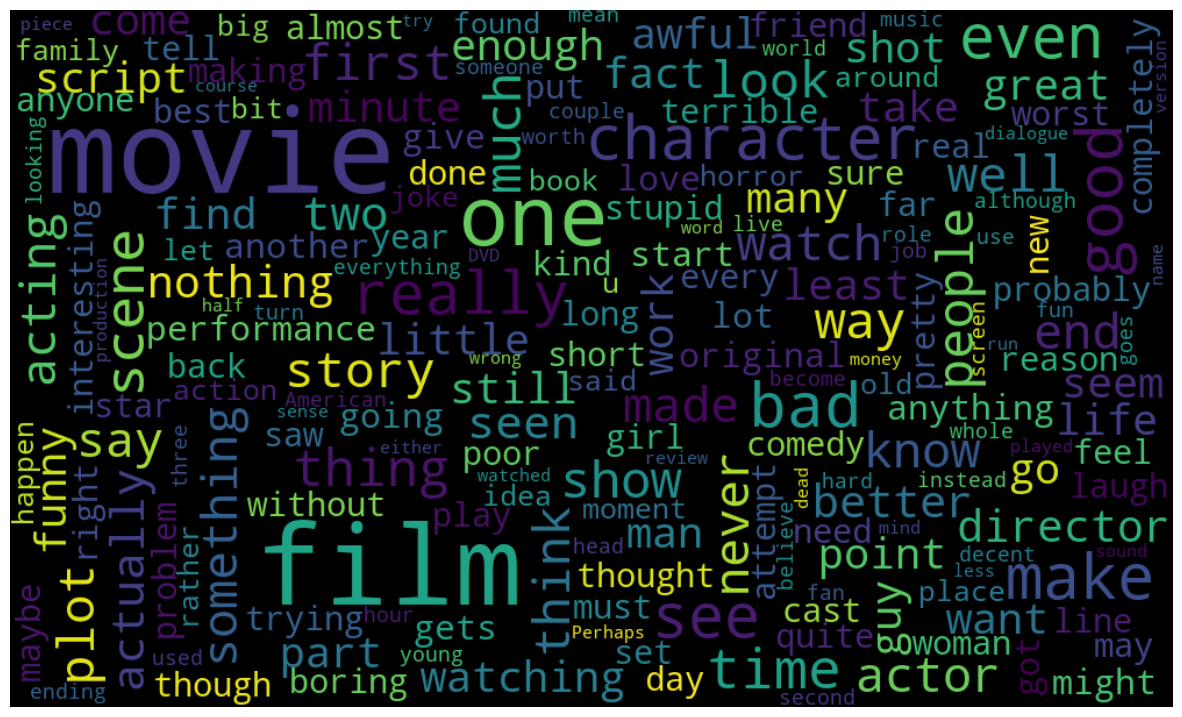

In [11]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
plt.figure(figsize = (15,12))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)

plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

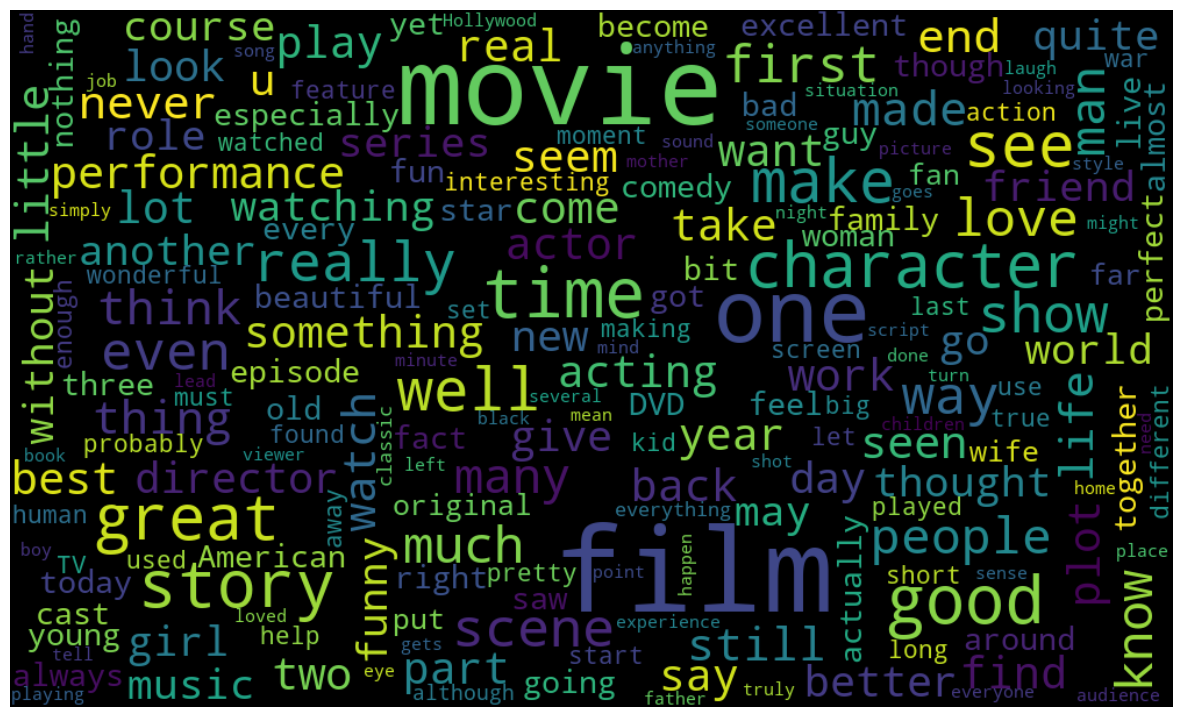

In [12]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [14]:
reviews = cv.fit_transform(data['text']).toarray()

In [15]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\MY\AppData\Local\Temp\ipykernel_5292\3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


In [16]:
data['sentiment'].value_counts()

sentiment
0    500
1    500
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
model=LogisticRegression()
model.fit(reviews_train,sent_train)
pred=model.predict(reviews_test)
accuracy=accuracy_score(pred,sent_test)
print("Test accuracy: {:.2f}%".format(accuracy*100))

Test accuracy: 84.00%


In [21]:
predict = model.predict(reviews_test)

In [22]:
model.fit(reviews_train,sent_train)

LogisticRegression()

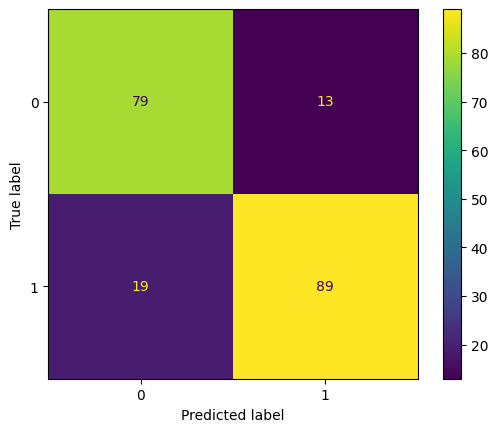

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [24]:
import pickle as pk

In [25]:
pk.dump(model,open('model.pkl','wb'))

In [26]:
pk.dump(cv,open('scaler.pkl','wb'))